In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import zscore
import glob

In [2]:
meta = pd.read_csv('data/metadata.csv')

In [3]:
meta = meta[meta['SITE_ID'] == 'NYU']
all_subs = meta['SUB_ID'].values
print(len(all_subs))

184


In [4]:
# get subject ids of all subjects with group MCI
# mci_subjects = meta[meta['DX_GROUP'] != 'AD']['SUB_ID'].values
# ad_subjects = meta[meta['DX_GROUP'] == 'AD']['SUB_ID'].values
cn_subjects = meta[meta['DX_GROUP'] != 1]['SUB_ID'].values
asd_subjects = meta[meta['DX_GROUP'] == 1]['SUB_ID'].values

In [5]:
print(cn_subjects.shape)
print(asd_subjects.shape)

(105,)
(79,)


In [6]:
# all_subs = np.concatenate([mci_subjects, ad_subjects])
all_subs = np.concatenate([cn_subjects, asd_subjects])
print(all_subs.shape)

(184,)


In [7]:
def load_timeseries(subid, path='data/input_data/ADNI/AAL/'):
    full_path = path + str(subid) + '_timeseries.txt' 
    if os.path.exists(path + str(subid) + '_timeseries.txt'):
        return np.loadtxt(path + str(subid) + '_timeseries.txt')
    print(full_path)
    return None

def load_timeseries_abide(subid, path='data/input_data/abide/nyu_power/'):
    full_path = path + str(subid) + '.txt'
    if os.path.exists(full_path):
        return np.loadtxt(full_path)
    print(full_path)
    return None

In [8]:
not_found = []
all_timeseries = []
found_subs = []
for i in all_subs:
    print(i)
    k = load_timeseries_abide(i)
    if k is None:
        not_found.append(i)
    else: 
        k = zscore(k, axis=1)
        if not os.path.exists('data/input_data/abide/nyu_power_zscore/' + str(i) + '.txt'):
            np.savetxt('data/input_data/abide/nyu_power_zscore/' + str(i) + '.txt', k)
        found_subs.append(i)
        all_timeseries.append(k)

51036
51038
51039
51040
51041
51042
51044
51045
51046
51047
51048
51049
51050
51051
51052
51053
51054
51055
51056
51057
51058
51059
51060
51061
51062
51063
51064
51065
51066
51067
51068
51069
51070
51071
51072
51073
51074
51075
51076
51077
51078
51079
51080
51081
51082
51083
51084
51085
51086
51087
51088
51089
51090
51091
51093
51094
51095
51096
51097
51098
51099
51100
51101
51102
51103
51104
51105
51106
51107
51108
data/input_data/abide/nyu_power/51108.txt
51109
51110
51111
51112
51113
51114
51115
data/input_data/abide/nyu_power/51115.txt
51116
51117
51118
51119
data/input_data/abide/nyu_power/51119.txt
51120
data/input_data/abide/nyu_power/51120.txt
51121
51122
51123
51124
51125
data/input_data/abide/nyu_power/51125.txt
51126
51127
data/input_data/abide/nyu_power/51127.txt
51128
51129
51130
51131
51146
51147
51148
51149
51150
51151
51152
51153
51154
51155
51156
51159
data/input_data/abide/nyu_power/51159.txt
50952
data/input_data/abide/nyu_power/50952.txt
50953
data/input_data/abide/

In [12]:
len(all_timeseries)

171

In [10]:
not_found = []
cn_timeseries= []
for i in cn_subjects:
    k = load_timeseries_abide(i)
    if k is None:
        not_found.append(i)
    else: 
        cn_timeseries.append(k)
len(not_found)

data/input_data/abide/nyu_power/51108.txt
data/input_data/abide/nyu_power/51115.txt
data/input_data/abide/nyu_power/51119.txt
data/input_data/abide/nyu_power/51120.txt
data/input_data/abide/nyu_power/51125.txt
data/input_data/abide/nyu_power/51127.txt
data/input_data/abide/nyu_power/51159.txt


7

In [9]:
not_found = []
asd_timeseries= []
for i in asd_subjects:
    k = load_timeseries_abide(i)
    if k is None:
        not_found.append(i)
    else: 
        asd_timeseries.append(k)
len(not_found)

data/input_data/abide/nyu_power/50952.txt
data/input_data/abide/nyu_power/50953.txt
data/input_data/abide/nyu_power/50971.txt
data/input_data/abide/nyu_power/50975.txt
data/input_data/abide/nyu_power/50980.txt
data/input_data/abide/nyu_power/51030.txt


6

In [11]:
all_concat = np.vstack(all_timeseries).T
cn_concat = np.vstack(cn_timeseries).T
asd_concat = np.vstack(asd_timeseries).T
mci_concat = np.vstack(mci_timeseries).T
print(cn_concat.shape)
# ad_timeseries = np.array([np.])

NameError: name 'mci_timeseries' is not defined

In [ ]:
np.savetxt('data/abide_nyu_concat.txt', all_concat)
np.savetxt('data/cn_nyu_concat.txt', cn_concat)
np.savetxt('data/asd_nyu_concat.txt', asd_concat)
# np.savetxt('data/mci_concat.txt', mci_concat)

In [ ]:
f = open('data/input_data/abide_nyu_subjects.txt', 'w')
for sub in all_subs:
    f.write(str(sub) + '\n')
f.close()

In [ ]:
asd_subjects
f = open('data/input_data/abide_nyu_asd_subjects.txt', 'w')
for sub in asd_subjects:
    f.write(str(sub) + '\n')
f.close()

In [ ]:
cn_subjects
f = open('data/input_data/abide_nyu_cn_subjects.txt', 'w')
for sub in cn_subjects:
    f.write(str(sub) + '\n')
f.close()

In [ ]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [ ]:
all_concat_mean = np.mean(all_concat, axis=1)
r_avg = moving_average(all_concat_mean, 100)
plt.plot(r_avg)

## Region wise chiSG and chiUni

In [12]:
# finding the maximum length of time series with decent amount of subjects
datalen = [i.shape[0] for i in all_timeseries]
datalen = np.array(datalen)
t_max = range(90, 170)
count = []
for t in t_max:
    c = np.sum(datalen > t)
    count.append(c)
# plt.plot(t_max, count)
t_max = t_max[::-1]
count = count[::-1]
count = np.array(count)
idx = np.argmax(count > 130)
print(t_max[idx])

144


In [13]:
# truncating and binarizing
max_t = t_max[idx]
print(all_timeseries[0].shape) 
# print(np.mean([i.shape[0] for i in all_timeseries]))
data_trunc = [] 
subs = []
for sub, i in zip(found_subs, all_timeseries):
    if i.shape[0] < max_t:
        continue
    subs.append(sub)
    trunc = i[:max_t, :]
    binarized = np.where(trunc > 0, 1, -1)
    data_trunc.append(binarized.T) 
data_truc = np.array(data_trunc)
# print(data_truc.shape) # [sub,roi, time]
data_sub = np.swapaxes(data_truc, 0, 1) # [rio, sub, time]
print(data_sub.shape)

(162, 264)
(264, 134, 144)


(array([ 2.,  6., 18., 36., 35., 61., 49., 40., 14.,  3.]),
 array([-5.13888889, -4.37361111, -3.60833333, -2.84305556, -2.07777778,
        -1.3125    , -0.54722222,  0.21805556,  0.98333333,  1.74861111,
         2.51388889]),
 <BarContainer object of 10 artists>)

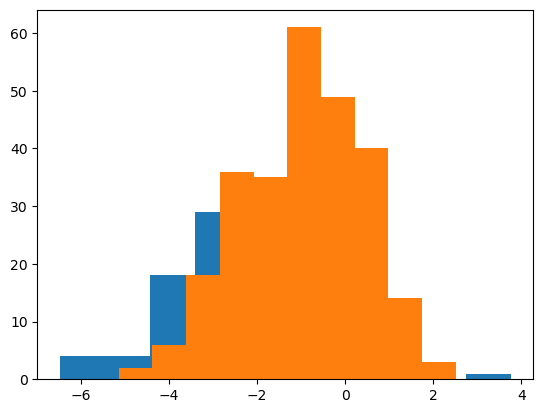

In [14]:

m_r = np.sum(np.mean(data_sub, axis=2), axis=1)
m_s = np.sum(np.mean(data_sub, axis=2), axis=0)
plt.hist(m_s)
plt.hist(m_r)


In [16]:
d = data_sub[0]
print((d @ d.T/d.shape[1]).shape)

(134, 134)


In [17]:
def getChi(data):
    N = data.shape[0]
    t_max = data.shape[1]
    corr = 1/t_max * (data @ data.T) # NxN
    mu = np.mean(data, axis=1) # Nx1
    cov = corr - mu @ mu.T # NxN
    # print(np.sum(cov))
    chiSG = np.sum(cov**2, axis=1)
    chiUni = np.sum(cov, axis=1)
    # l, _ = np.linalg.eig(cov)
    # chiSG = np.dot(l, l) / N;
    print(chiSG, chiUni)
    return chiSG, chiUni, corr, mu

In [20]:
data_r = np.swapaxes(data_sub, 0, 1)
chis_r = np.zeros((data_r.shape[0], 4), dtype=object).tolist()
for i in range(data_r.shape[0]):
    chis_r[i][0], chis_r[i][1], chis_r[i][2], chis_r[i][3]= getChi(data_r[i])

xuni = [i[1] for i in chis_r]

[430.9983139  439.56750114 427.87099909 432.54632487 429.60848194
 428.81338592 427.49377    431.65554984 440.13085848 430.99771376
 444.12194216 428.13934614 430.52583448 427.28963763 431.97422268
 432.52034751 429.8786294  431.94001486 432.33996342 427.47773777
 424.12820073 431.50200046 429.65323503 429.97979538 426.11671239
 420.07058756 430.70861911 423.88060128 432.0028578  433.1645519
 432.2789209  426.84896548 429.62005601 431.18041267 428.60702446
 430.93341335 428.54803955 428.29452446 427.05927069 431.4461877
 424.00431527 432.77686328 428.81012803 429.49419867 432.14208962
 433.92209648 434.44078647 426.55464106 422.06064243 431.52789209
 424.16309442 431.11036808 430.24642775 433.05944216 428.39689072
 431.1594936  430.62494284 429.50765889 433.60633859 429.99222679
 421.50937357 434.32487426 433.55241198 432.01768976 431.11208276
 429.90846479 428.83344765 431.80395519 432.26100251 432.815615
 434.89260402 431.8834305  430.09416438 427.23699703 427.44327275
 440.95313214 

(array([ 6.,  6., 11., 27., 29., 17., 20., 11.,  6.,  1.]),
 array([-460.00010522, -437.56489899, -415.12969276, -392.69448653,
        -370.2592803 , -347.82407407, -325.38886785, -302.95366162,
        -280.51845539, -258.08324916, -235.64804293]),
 <BarContainer object of 10 artists>)

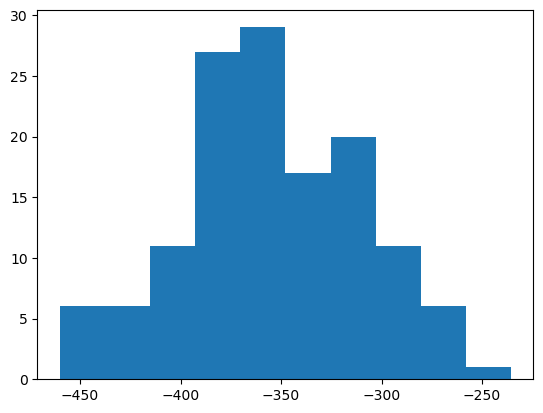

In [23]:
xuni = np.array(xuni)
plt.hist(np.mean(xuni, axis=1))

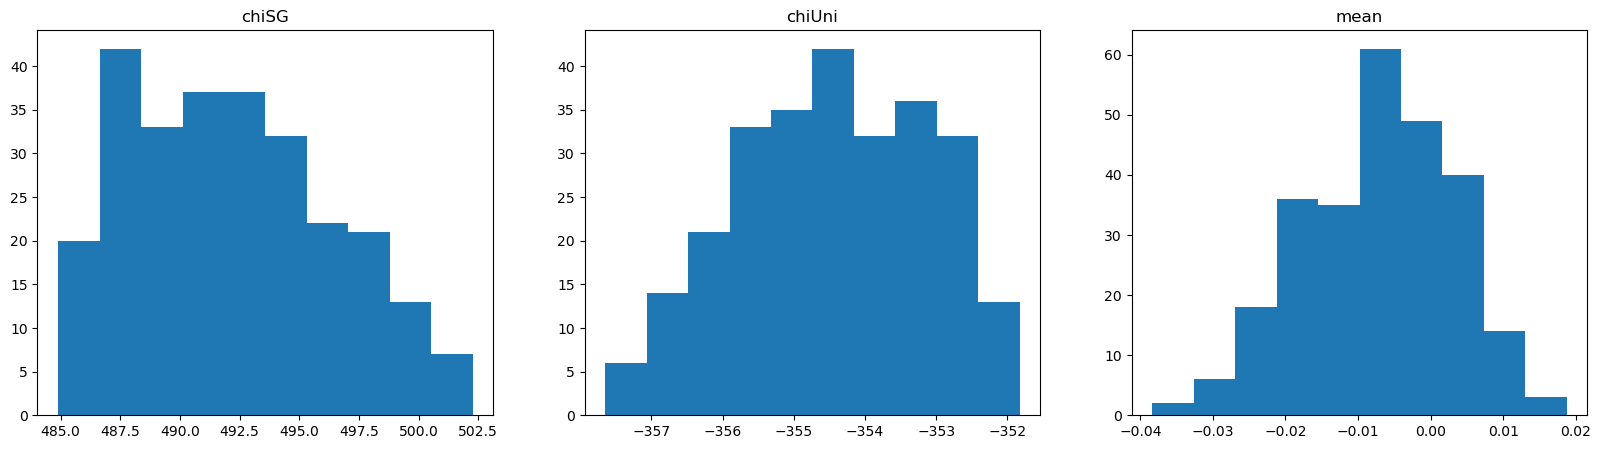

In [43]:
xsg = [i[0] for i in chis_r]
xsg_mean = np.mean(xsg, axis=0)
xuni = [i[1] for i in chis_r]
xuni_mean = np.mean(xuni, axis=0)
figs, axes = plt.subplots(1, 3, figsize=(20, 5))
m = [i[3] for i in chis_r]
m_mean= np.mean(m, axis=0)
axes[0].hist(xsg_mean, label='chiSG')
axes[0].set_title('chiSG')
axes[1].hist(xuni_mean, label='chiUni')
axes[1].set_title('chiUni')
axes[2].hist(m_mean, label='mean')
axes[2].set_title('mean')
plt.show()

In [46]:
data_r = np.swapaxes(data_sub, 0, 1)

chis_r = np.zeros((data_r.shape[0], 3), dtype=object).tolist()
for i in range(data_r.shape[0]):
    chis_r[i][0], chis_r[i][1], chis_r[i][2]= getChi(data_r[i])
# np.savetxt('data/chis/abide_nyu_regions.txt', chis)

431.7955045568857 -333.76494107744105
484.560935478434 -354.93823653198643
586.7731975506739 -390.18192340067327
473.01653125422166 -350.1434132996633
510.80304309004384 -364.1535143097643
378.94383180441235 -312.7304292929293
640.8661572320427 -408.9311868686869
273.623175354042 -265.24484427609434
453.78522481274933 -342.857218013468
579.3368190326618 -387.56797138047136
584.5402013966827 -389.4555976430975
509.3804579033647 -363.5965909090908
313.8419700476989 -284.32975589225583
505.37336971664956 -361.99989478114475
579.1497205854845 -387.8291245791246
448.4990052921187 -340.68160774410774
459.7413034911226 -344.86121632996634
546.4441541183439 -376.73569023569024
539.9355469967812 -374.86100589225595
503.4469173716976 -360.77872474747466
587.3948272998114 -390.8250210437711
384.9187038206133 -315.3112373737373
503.98042600484007 -361.80187289562286
484.6428162070159 -354.41045875420866
481.63951569612004 -353.3347011784511
314.71056878747595 -284.30713383838383
407.1543383617553 

51036

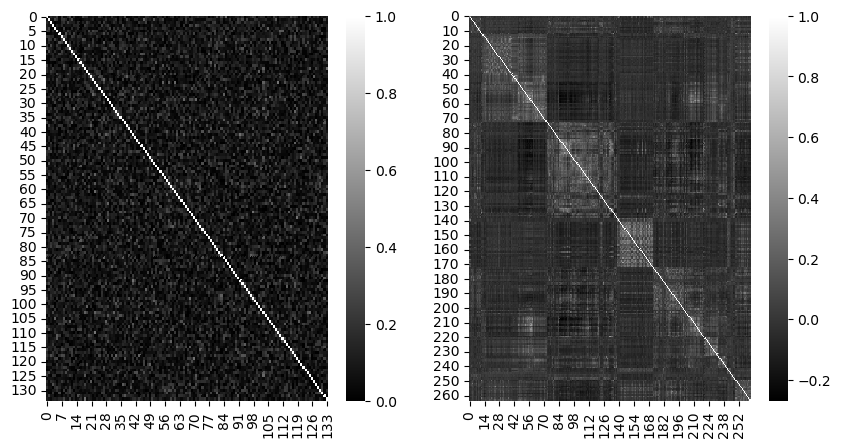

In [77]:
import seaborn as sns
cov_s = []
for i in range(len(chis)):
    cov_s.append(chis[i][2])
cov_r = []
for i in range(len(chis_r)):
    cov_r.append(chis_r[i][2])
# cov_s = np.mean(np.array(cov_s), axis=0)
cov_r = np.mean(np.array(cov_r), axis=0)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(abs(cov_s[100]), ax=axes[0], cmap='gray', vmin=0)
# sns.heatmap(cov_s, ax=axes[0], vmax=0.5)
# sns.heatmap(cov_r, ax=axes[1])
sns.heatmap(cov_r, ax=axes[1], cmap='gray')
subs[0]

In [69]:
subs[0]

51036

In [70]:
meta[meta['SUB_ID'] ==subs[0]]

,Unnamed: 0.1,Unnamed: 0,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,...,qc_notes_rater_1,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP
722,722,723,51036,723,51036,NYU,NYU_0051036,2,0,8.04,...,NaN,maybe,skull-striping fail,OK,NaN,OK,NaN,OK,NaN,0


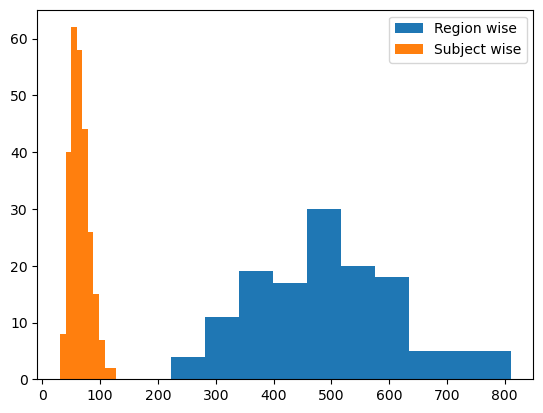

In [57]:
chi_sg_r = [i[0] for i in chis_r]
chi_sg_s = [i[0] for i in chis]
plt.hist(chi_sg_r, label='Region wise')
plt.hist(chi_sg_s, label='Subject wise')
plt.legend()

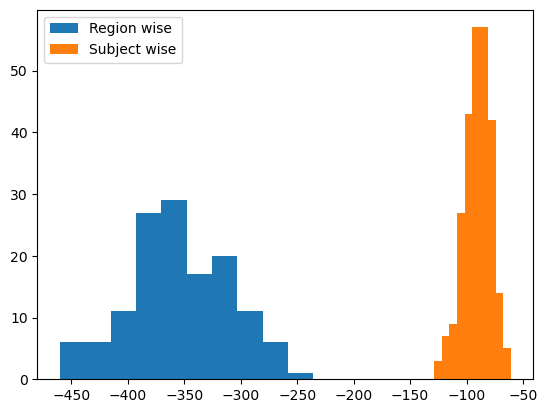

In [58]:
chi_sg_r = [i[1] for i in chis_r]
chi_sg_s = [i[1] for i in chis]
plt.hist(chi_sg_r, label='Region wise')
plt.hist(chi_sg_s, label='Subject wise')
plt.legend()

In [70]:
data_sub[0] @ data_sub[0].T

array([[144,  -6,  12, ..., -12,  42,  18],
       [ -6, 144, -18, ...,   2,  16,   0],
       [ 12, -18, 144, ...,  -4,  30,   6],
       ...,
       [-12,   2,  -4, ..., 144,   2,   2],
       [ 42,  16,  30, ...,   2, 144,   0],
       [ 18,   0,   6, ...,   2,   0, 144]])